In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
file = r'UEH-reviews.xlsx'
df = pd.read_excel(file)

### Cleaning context

In [9]:
def preprocess_and_sort_data(df):
    # Loại bỏ các dòng không có đánh giá
    df = df.dropna(subset=['context'])
    # Sắp xếp theo giá trị số lượng like từ thấp đến cao
    df = df.sort_values(by='likes', ascending=True)
    # Đặt lại chỉ số của DataFrame sau khi sắp xếp
    df = df.reset_index(drop=True)
    return df

# Sử dụng hàm
df = preprocess_and_sort_data(df)
df.tail(5)

,reviewer,date,stars,likes,context,Cơ sở
1009,Au Hai Vinh,6 days ago,5.0,NaN,Ok,uehB
1010,Vi Trần,6 years ago,5.0,NaN,Ok,uehKTX4345
1011,phuong minh,a month ago,5.0,NaN,Ok,uehKTX4345
1012,Ngân Đặng Thị Thanh,4 years ago,5.0,NaN,Ok,uehKTX4345
1013,Thuong Vu,7 years ago,4.0,NaN,OK,uehA


In [10]:
df.to_excel('UEH-reviews-cleaned.xlsx', index=False)

### Sentiment Analysis
[Colab: Workshop](https://colab.research.google.com/drive/1nj2z0fRUovlE2dOpEN1QF_YdYxP9xbFj?usp=sharing&fbclid=IwAR2kxlkKncYaN5ZSZ0nz4EXKy9eSPFX9L187E6HXVBGggOEsGwsZtPaEqao#scrollTo=1Gz00rEOMjik)

[underthesea github](https://github.com/undertheseanlp/underthesea/blob/main/README.md)

[Colab: Testing](https://colab.research.google.com/drive/1Fv6Ogj7uq2-WThuzKQYOF6M0HlTwB4IV?usp=sharing)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Install Library

In [ ]:
!pip install underthesea

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 42.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from underthesea import text_normalize, word_tokenize, classify, sentiment
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

In [ ]:
file = r'UEH-reviews-cleaned.xlsx'
df = pd.read_excel(file)

#### Tạo cột sentiment và gán giá trị bằng thư viện

In [ ]:
df['sentiment'] = df.apply(lambda x : sentiment(x['context']), axis=1)

2023-11-29 04:18:19,357 https://github.com/undertheseanlp/playground/releases/download/1.3.x/sa_svm_vlsp2016-sa_20210107.zip not found in cache, downloading to /tmp/tmp_seu4wft


100%|██████████| 2234880/2234880 [00:00<00:00, 7463492.64B/s]

2023-11-29 04:18:20,871 copying /tmp/tmp_seu4wft to cache at /root/.underthesea/models/sa_svm_vlsp2016-sa_20210107.zip
2023-11-29 04:18:20,884 removing temp file /tmp/tmp_seu4wft


In [ ]:
df

,reviewer,date,stars,likes,context,Cơ sở,sentiment
0,Hao Nguyen,5 years ago,4.0,1.0,Ok,uehKTX135-1,positive
1,Phan Hoà,6 years ago,5.0,1.0,"Nơi đào tạo uy tín, chất lượng tốt đã được khẳ...",uehC,None
2,Tan Thien,3 years ago,5.0,1.0,"I studied here, from my perspective, everythi...",uehA,positive
3,Trần Anh Thư,5 years ago,5.0,1.0,Nơi đáng sống,uehKTX4345,negative
4,Anh Tuan Le,7 months ago,5.0,1.0,Đại học tui mà,uehE,None
...,...,...,...,...,...,...,...
1009,Au Hai Vinh,6 days ago,5.0,NaN,Ok,uehB,positive
1010,Vi Trần,6 years ago,5.0,NaN,Ok,uehKTX4345,positive
1011,phuong minh,a month ago,5.0,NaN,Ok,uehKTX4345,positive
1012,Ngân Đặng Thị Thanh,4 years ago,5.0,NaN,Ok,uehKTX4345,positive


In [ ]:
df_group = df.groupby('sentiment')['sentiment'].count()

In [ ]:
df_group

sentiment
negative    182
positive    488
Name: sentiment, dtype: int64

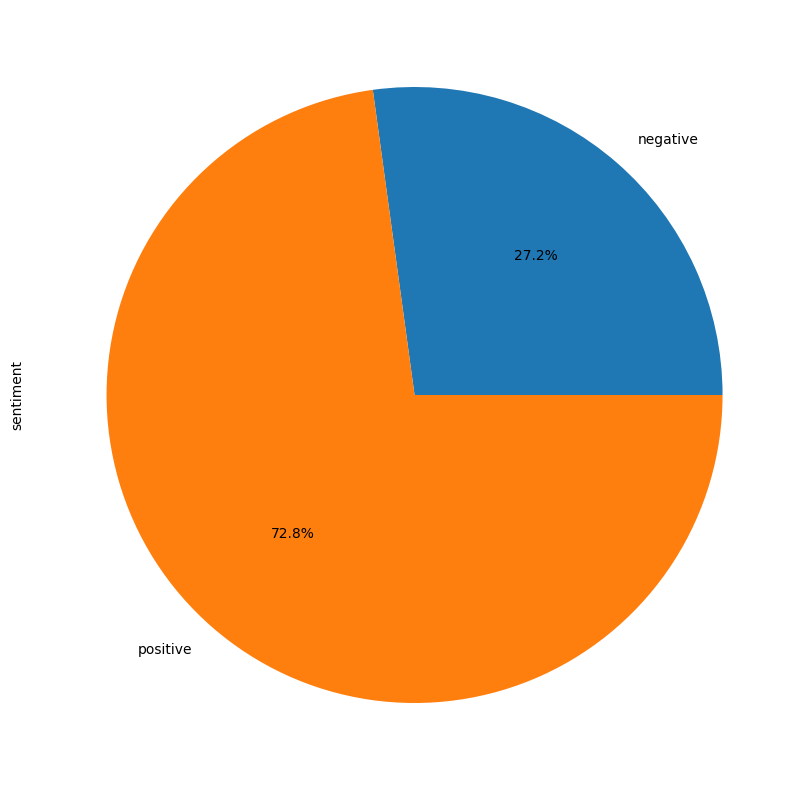

In [ ]:
df_group.plot.pie(figsize=(10,10),autopct='%1.1f%%')
plt.show()

In [ ]:
df.to_excel('UEH-sentiment.xlsx')
files.download('UEH-sentiment.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>